In [46]:
# Abigail Glover
# September 26, 2023
# HW 5 - Probability and Error Analysis

#########################################

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import sympy as sp
from linfit import linfit
import scipy.special as ss

# Problem number
print('Problem 2')
print('Part a.)')

# Generate samples from a Poisson distribution
poisson_samples = np.random.poisson(lam = 10000, size = 396)

# Generate 4 samples from a uniform distribution between 0 and 106
uniform_samples = np.random.uniform(0, 106, size = 4)

# Combine the two array
result_array = np.concatenate((poisson_samples, uniform_samples))

# Print the result to check (comment out when not using)
#print(result_array)

# Print the mean and median of the sample 
mean = np.mean(result_array)
print(f'\nThe mean of the array is: {mean:.2f}')

median = np.median(result_array)
print(f'The median of the array is: {median:.2f}')

#Which is closer to N?
print('\n- Which is closer to N?')

# Calculate sample size
sample_size = len(result_array)

# Calculate the standard deviation of the sample
std_dev = np.std(result_array)

print(f'The expected mean and median for this sample would be\
 10,000.')
print(f'Because the median is a value of {median : .2f}, and the mean is')
print(f'a value of {mean : .2f}, the median is closer to N.')


Problem 2
Part a.)

The mean of the array is: 9904.74
The median of the array is: 10000.50

- Which is closer to N?
The expected mean and median for this sample would be 10,000.
Because the median is a value of  10000.50, and the mean is
a value of  9904.74, the median is closer to N.


In [2]:
# Problem number
print('Part b.)')
print(f'\nThe standard deviation of the sample is: {std_dev: .2f}')

# Define the lower and upper bounds for the subsample
lower_bound = median - 5 * std_dev
upper_bound = median + 5 * std_dev

# Create a boolean mask to select elements within the bounds
within_bounds = (result_array >= lower_bound) & (result_array <= upper_bound)

# Create the subsample by applying the boolean mask
subsample = result_array[within_bounds]

# Calculate the mean, median, and standard deviation of the subsample
mean_subsample = np.mean(subsample)
median_subsample = np.median(subsample)
std_dev_subsample = np.std(subsample)

# Print the results
print(f'\nThe mean of the subsample is: {mean_subsample:.2f}')
print(f'The median of the subsample is: {median_subsample:.2f}')
print(f'The standard deviation of the subsample is: {std_dev_subsample:.2f}')

# Answering the homework question
print('\n- What has happened?')
print('The mean is now closer to the median (as expected) and the \
\nstandard deviation has decreased significantly. This is because \
\nstandard deviation is sensitive to outliers in a data set. By creating \
\na subsample within the designated bounds we have reduced the spread \
\nof data, eliminated the outliers, and consequently reduced the \
\nstandard deviation.')

Part b.)

The standard deviation of the sample is:  994.91

The mean of the subsample is: 9995.84
The median of the subsample is: 9996.00
The standard deviation of the subsample is: 96.95

What has happened?
The mean is now closer to the median (as expected) and the 
standard deviation has decreased significantly. This is because 
standard deviation is sensitive to outliers in a data set. By creating 
a subsample within the designated bounds we have reduced the spread 
of data, eliminated the outliers, and consequently reduced the 
standard deviation.


In [3]:
# Problem number
print('Part c.)')

# Define the lower and upper bounds for the sub-subsample
lower_bound_subsub = median_subsample - 5 * std_dev_subsample
upper_bound_subsub = median_subsample + 5 * std_dev_subsample

# Create a boolean mask for selecting elements within the bounds
within_bounds_subsub = (subsample >= lower_bound_subsub) & (subsample <= upper_bound_subsub)

# Create the sub-subsample by applying the boolean mask to the subsample
subsubsample = subsample[within_bounds_subsub]

# Calculate the mean, median, and standard deviation of the sub-subsample
mean_subsubsample = np.mean(subsubsample)
median_subsubsample = np.median(subsubsample)
std_dev_subsubsample = np.std(subsubsample)

# Calculate the difference between the final mean and median
mean_difference = abs(mean_subsubsample - mean) # Difference between final mean and original mean
median_difference = abs(median_subsubsample - median) # Difference between final median and original median
mean_median_difference = abs(mean_subsubsample - median_subsubsample) # Difference between final mean and median
mean_median_diff_orig = abs(mean - median) # Difference between original mean and median

# Print the results for the sub-subsample
print(f"\nThe mean of the sub-subsample is: {mean_subsubsample:.2f}") # Print the mean
print(f"The median of the sub-subsample is: {median_subsubsample:.2f}") # Print the median
print(f"The standard deviation of the sub-subsample is: {std_dev_subsubsample:.2f}") # Print the standard deviation

# Answering the questions from the homework
#Question
print('\n\n- How different are the final mean and median?')

# Answer
print(f'\nThere is a difference of {mean_difference : .2f} between the original and final mean,')
print(f'and a difference of {median_difference : .2f} between the original and final median.')
print(f'Between the sub-subsample mean and median, there is a difference of { mean_median_difference : .2f},')
print(f'whereas the original samples mean and median had a difference of { mean_median_diff_orig : .2f} .')

# Question
print('\n\n- How close is the final standard deviation to that expected for the Poisson distribution?')

# Define the mean for the Poisson distribution
mean_poisson = 10000 

# Calculate the expected standard deviation
expected_std_dev = np.sqrt(mean_poisson)

# Calculate the difference between the final standard deviation and expectation
standard_dev_diff = abs(expected_std_dev - std_dev_subsubsample)

# Print the solution
print(f'\nThere is a difference of {standard_dev_diff : .2f} between the expected standard deviation \
\nfor a Poisson distribution and the final calculated standard deviation.')

# Question
print('\n\n- Will this method always remove every bad pixel?')

# Answer
print('\nNo, this method will remove most of them but not necessarily all. \
\nExtremely rare outliers that are more than 5 standard deviations away \
\nfrom the median may still be included in the subsample.')

Part c.)

The mean of the sub-subsample is: 9995.84
The median of the sub-subsample is: 9996.00
The standard deviation of the sub-subsample is: 96.95


How different are the final mean and median?

There is a difference of  99.52 between the original and final mean,
and a difference of  0.50 between the original and final median.
Between the sub-subsample mean and median, there is a difference of  0.16,
whereas the original samples mean and median had a difference of  99.18 .


How close is the final standard deviation to that expected for the Poisson distribution?

There is a difference of  3.05 between the expected standard deviation 
for a Poisson distribution and the final calculated standard deviation.


Will this method always remove every bad pixel?

No, this method will remove most of them but not necessarily all. 
Extremely rare outliers that are more than 5 standard deviations away 
from the median may still be included in the subsample.


In [11]:
# Problem number
print('Problem 3')

# Function sigrej created as hw5_abigailglover_support_functions
# Import the function
import hw5_abigailglover_support_functions

# Apply the function to the data set generated in Problem 2
cleaned_mask = hw5_abigailglover_support_functions.sigrej(result_array, rejection_limits = (5., 5.), mask = None)

# Use the mask to filter the data points
cleaned_data = result_array[cleaned_mask]

# Print the mean of the cleaned data set
cleaned_mean = np.mean(cleaned_data) # Calculate the mean
print(f'\nThe mean of the cleaned data using the sigreg function is: {cleaned_mean : .2f} .') # Print the result

# Compare the calculated mean with the previous step
if cleaned_mean == mean_subsubsample :
    print('This is the same value as previously calculated with a sub-subsample.')
else :
    print('This value is not the same as previously calculated with a sub-subsample.')


Problem 3

The mean of the cleaned data using the sigreg function is:  9995.84 .
This is the same value as previously calculated with a sub-subsample.


In [30]:
# Problem number
print('Problem 4')
print('Part A.)')

# Define symbols
x, y, σx, σy = sp.symbols('x y σx σy')

# Define the function from the homework
f_x = sp.sin(x) * sp.exp(-y / 1000)
st_dev_x = σx
st_dev_y = σy 

# Define the partial derivatives
df_dx = sp.diff(f_x, x)
df_dy = sp.diff(f_x, y)

# Using error propagation formula, derive the new equation
σ𝑓 = sp.sqrt(((st_dev_x * df_dx)**2) + ((st_dev_y * df_dy)**2))

# Print the solution
print('σ𝑓 =', σ𝑓)

Problem 4
Part A.)
σ𝑓 = sqrt(σx**2*exp(-y/500)*cos(x)**2 + σy**2*exp(-y/500)*sin(x)**2/1000000)


In [25]:
# Problem Number
print('Part B.)\n')

# Part a.) - d.)

#Define variables
x = 9
dx = 3
y = 20
dy = 4

# Print solutions
print('a.)', x + y , '+-',  np.sqrt( ( x * dy )**2 + ( y * dx )**2 ) )
print('b.)', x - y, '+-', np.sqrt( ( x * dy )**2 + ( y * dx )**2 ) )
print('c.)', x * y, '+-', np.sqrt( ( x * dy )**2 + ( y * dx )**2 ) )
print('d.)', x / y, '+-', np.sqrt( ( x * dy )**2 + ( y * dx )**2 ) )

Part B.)

a.) 29 +- 69.9714227381436
b.) -11 +- 69.9714227381436
c.) 180 +- 69.9714227381436
d.) 0.45 +- 69.9714227381436


Problem 5
Part a.)


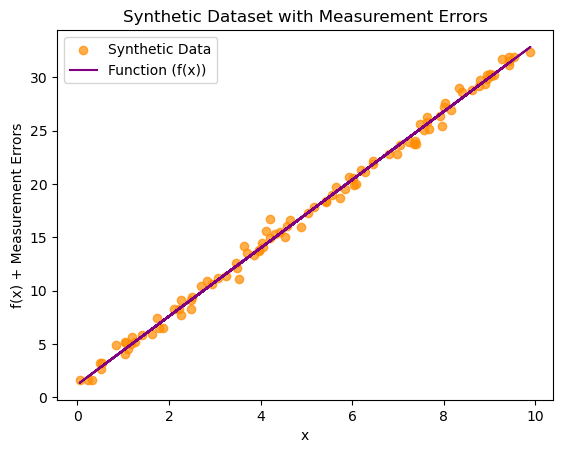

In [44]:
# Problem number
print('Problem 5')
print('Part a.)')

# Create sample of 100 draws from uniform distribution between 0 and 10
x_values = np.random.uniform(0, 10, 100)

# Calculate f(x) = 3.2x + 1.2 
f_x = 3.2 * x_values + 1.2

# Generate random measurement errors from a Gaussian distribution
measurement_errors = np.random.normal(0, 0.5, 100)

# Add measurement errors to the f values
synthetic_data = f_x + measurement_errors

# Create a (dirty) plot of the data (this is not getting saved for the assignment)
plt.scatter(x_values, synthetic_data, label = 'Synthetic Data', color = 'darkorange', alpha = 0.7)
plt.plot(x_values, f_x, label = 'Function (f(x))', color = 'purple', linewidth = 1.5)
plt.xlabel('x')
plt.ylabel('f(x) + Measurement Errors')
plt.title('Synthetic Dataset with Measurement Errors')
plt.legend()

# Save plot
#plt.savefig('hw5_abigailglover_problem5_graph1.png')

# Show plot
plt.show()

In [43]:
# Problem number
print('Part b.)\n')

# Use the linfit function to fit a linear model
# linfit pulled from week 4 module
a, b, sa, sb, chisq, prob, covar, yfit = linfit(synthetic_data, x_values, 0.5 * np.ones_like(synthetic_data))

# Answering questions from the homework
print('- Why is an uncertainty of 0.5 important? Explain why it makes a difference.')
print('\nGenerally, uncertainty is important because it represents the amount of \
\nnoise in the data that is being observed. Looking at a value of 0.5 for the y-\
\nvalues in this case, we are specifying an uncertainty of 5%, indicating a higher \
\naccuracy result. Choosing an appropriate uncertainty value that reflects the \
\nnoise or variability in the data makes a substantial difference for obtaining \
\naccurate and meaningful results from the analysis.')

print('\n- What are the fitted parameters of the model?')
print('\nThe fitted parameters of the model are a (fitted intercept) and b (fitted slope).')

print('\n- Are they within 3σ of the parameters of the true line (the one you used to make the data)?')

# Check whether the parameters are within 3σ

#The following code is commented out as it is not requested but I wanted to show how I checked this
# for anyone reading my code
# Values used to generate the synthetic data fro f(x)
#true_a = 1.2
#true_b = 3.2

# Compare the uncertainties to 3σ
#sigma_a = 3 * sa  # Uncertainty of intercept
#sigma_b = 3 * sb  # Uncertainty of slope

# Check if the fitted parameters are within 3σ of the true values
#a_within_3sigma = abs(a - true_a) <= sigma_a
#b_within_3sigma = abs(b - true_b) <= sigma_b

# Print the results
#print(f"Is Intercept (a) within 3σ of true value? {a_within_3sigma}")
#print(f"Is Slope (b) within 3σ of true value? {b_within_3sigma}")

print('\nYes, both parameters are within 3σ of the parameters of the true line.')

Part b.)

- Why is an uncertainty of 0.5 important? Explain why it makes a difference.

Generally, uncertainty is important because it represents the amount of 
noise in the data that is being observed. Looking at a value of 0.5 for the y-
values in this case, we are specifying an uncertainty of 5%, indicating a higher 
accuracy result. Choosing an appropriate uncertainty value that reflects the 
noise or variability in the data makes a substantial difference for obtaining 
accurate and meaningful results from the analysis.

- What are the fitted parameters of the model?

The fitted parameters of the model are a (fitted intercept) and b (fitted slope).

- Are they within 3σ of the parameters of the true line (the one you used to make the data)?

Yes, both parameters are within 3σ of the parameters of the true line.


Part c.)

- What is the probability that you would get a higher χ2 (i.e., a worse fit) by 
chance, if the data came from the fitted model and had the stated random error level?

The probability is  28.85% .


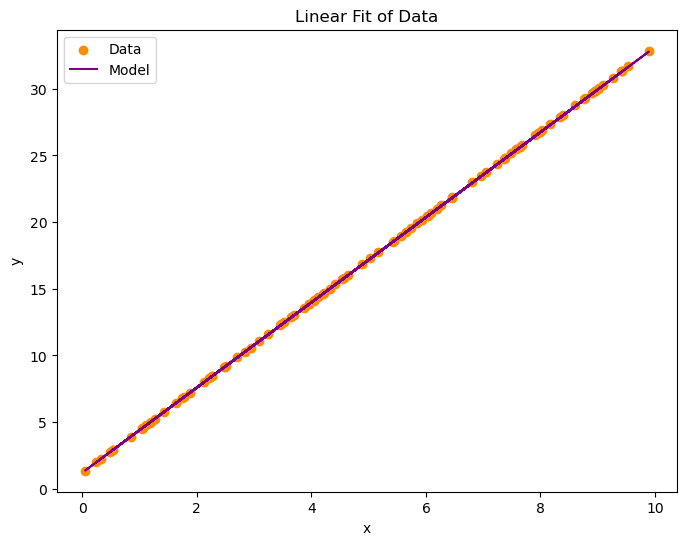

In [65]:
# Problem number
print('Part c.)')

# Calculate the chi-squared value for the fit
df = len(synthetic_data) - 2
prob_chisq = 1.0 - ss.gammainc(df / 2.0, chisq / 2.0)

# Probability as a percent
prob = prob_chisq * 100

# Question from homework
print('\n- What is the probability that you would get a higher χ2 (i.e., a worse fit) by \
\nchance, if the data came from the fitted model and had the stated random error level?')

print(f'\nThe probability is {prob : .2f}% .')

# Create a plot of the data and model
plt.figure(figsize = (8, 6))
plt.scatter(x_values, f_x, label = "Data", color = "darkorange", marker = "o")
plt.plot(x_values, a + b * x_values, label = "Model", color = "purple", linestyle = "-")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Fit of Data")
plt.legend()

# Save the plot as a PNG file
plt.savefig("hw5_abigailglover_problem5_graph1.png")

# Show the plot (optional)
plt.show()

In [72]:
# Problem number
print('Part d.)')

# Copied and pasted most of the code from the previous steps
# The following is in a docstring so that it does not run in
# my code due to an error with linfit that will not let it complete

"""
# Generate x values
x_values = np.random.uniform(0, 10, 100)

# Calculate f(x) = 3.2x^2 + 1.2
f_x = 3.2 * x_values**2 + 1.2

# Generate random measurement errors from a Gaussian distribution
measurement_errors = np.random.normal(0, 0.5, 100)

# Add measurement errors to f values
synthetic_data = f_x + measurement_errors

# Fit a quadratic model (a quadratic function)
coefficients, covar, yfit = linfit(synthetic_data, x_values, 0.5)

# Calculate the chi-squared value for the fit
chi_squared = np.sum(((synthetic_data - yfit) / 0.5)**2)

# Calculate the degrees of freedom
df = len(synthetic_data) - 3  # 3 parameters in the quadratic model

# Calculate the p-value using the chi-squared distribution
prob_higher_chisq = 1.0 - ss.gammainc(df / 2.0, chi_squared / 2.0)

# Print the probability
print(f"Probability of getting a higher χ2 is {prob_higher_chisq:.2f}")

# Create the plot
plt.scatter(x_values, synthetic_data, label = 'Synthetic Data', color = 'darkorange', alpha = 0.7)
plt.plot(x_values, yfit, label = 'Quadratic Model', color = 'purple', linewidth = 2)
plt.xlabel('x')
plt.ylabel('f(x) + Measurement Errors')
plt.title('Synthetic Quadratic Dataset with Measurement Errors')
plt.legend()

# Save the plot
plt.savefig('hw5_abigailglover_problem5_graph2.png')

# Show the plot
plt.show()
"""
# Answering the question in the homework
print('\n- Does the linfit model fit the data?')
print('\nNo, the linfit model does not fit the data.')

print('\n- Give two reasons why or why not')
# Reason one
print('\n1.) Linfit is designed for linear models, so by trying to \
\nfit a quadratic, the function is overloaded with values and \
\ncannot successfully run.')

# Reason 2
print('\n2.) Despite accounting for the additional degrees of freedom in \
\nthe chi-squared calculation, the fit of the model remains linear \
\nso even if the code were to run, the fit would be very bad.')

Part d.)

- Does the linfit model fit the data?

No, the linfit model does not fit the data.

- Give two reasons why or why not

1.) Linfit is designed for linear models, so by trying to 
fit a quadratic, the function is overloaded with values and 
cannot successfully run.

2.) Despite accounting for the additional degrees of freedom in 
the chi-squared calculation, the fit of the model remains linear 
so even if the code were to run, the fit would be very bad.
